In [1]:
#Importing libraries
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import pyprojroot.here as here

# Load Files

In [2]:
# TODO: modify these list if needed (eg. if you want to load only 1 csv from star3, delete other csvs in star3 list)
star3 = ['cleaned_ibis-sg-bencoolen.csv','cleaned_hotel-boss.csv','cleaned_hotel-G.csv',
           'cleaned_village-hotel-albert-court-by-far-east-hospitality.csv',
           'cleaned_holiday-inn-express-clarke-quay.csv']
star4 = ['cleaned_village-hotel-changi-by-far-east-hospitality.csv',
         'cleaned_park-regis.csv', 'cleaned_grand-mercure-sg-roxy.csv',
         'cleaned_paradox-sg-merchant-court.csv','cleaned_crowne-plaza.csv']
star5 = ['cleaned_fullerton.csv', 'cleaned_parkroyal-collection-marina-bay.csv', 'cleaned_pan-pacific.csv',
          'cleaned_mbs_total.csv', 'cleaned_swissotel-the-stamford.csv']

RAW_FOLDER = "data/processed/"

def combine_csv_to_dataframe(file_names, all_star = False, filterDate = True):
    """
    Combine multiple CSV files into a single DataFrame.

    Parameters:
    file_names (list): List of CSV file names. 
    all_star (bool): whether or not to load all the hotels (False if only want to load 1 type of hotel star). 
    filterData (bool): whether or not to remove all data dated before 2015

    Returns:
    pd.DataFrame: Combined DataFrame.
    """
    combined_df = pd.DataFrame()

    for file_name in file_names:
        file_interim_path = RAW_FOLDER + file_name
        file_path = here(file_interim_path)
        try:
            df = pd.read_csv(file_path)
            if all_star:
                if file_name in star3:
                    df["star"] = 3
                elif file_name in star4:
                    df["star"] = 4
                else:
                    df["star"] = 5
            #print(f"Length of {file_name} is {len(df)}")
            combined_df = pd.concat([combined_df, df], ignore_index=True)
            #print(len(combined_df))
        except FileNotFoundError:
            print(f"File not found: {file_name}")
        except pd.errors.EmptyDataError:
            print(f"Empty or invalid CSV file: {file_name}")
            
    combined_df = combined_df[combined_df.year > 2000]
                    
    return combined_df

In [3]:
data = combine_csv_to_dataframe(star3+star4+star5, all_star = True, filterDate = True)
#data[['traveller_username','date','travel_type','traveller_total_contributions','traveller_total_helpful_contributions','review_title','review_text','rating']].head(5)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68292 entries, 0 to 68291
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             68292 non-null  int64  
 1   traveller_username                     68292 non-null  object 
 2   review_title                           68253 non-null  object 
 3   review_text                            68292 non-null  object 
 4   travel_type                            31354 non-null  object 
 5   traveller_country_origin               51724 non-null  object 
 6   traveller_total_contributions          68103 non-null  object 
 7   traveller_total_helpful_contributions  54090 non-null  float64
 8   rating                                 54837 non-null  float64
 9   valid_rating                           68292 non-null  bool   
 10  label                                  54837 non-null  object 
 11  cl

,Unnamed: 0,traveller_username,review_title,review_text,travel_type,traveller_country_origin,traveller_total_contributions,traveller_total_helpful_contributions,rating,valid_rating,label,cleaned_review,combined_review,date,covid,year,stem_review,lem_review,star
0,0,Love_Life_Sydney,Clean and comfortable,Hotel rooms in Singapore are so expensive so t...,Trip type: Travelled as a couple,"Sydney, Australia",2302.0,871.0,4.0,True,Positive,clean comfortable hotel rooms singapore expens...,Clean and comfortable Hotel rooms in Singapore...,2023-08-01,PostCovid,2023,clean comfort hotel room singapor expens find ...,clean comfortable hotel room singapore expensi...,3
1,1,Bilal S,"Good hotel, great location",This is a great place! Location is great but t...,Trip type: Travelled with family,"Houston, Texas",4.0,NaN,5.0,True,Positive,good hotel great location great place location...,"Good hotel, great location This is a great pl...",2023-08-01,PostCovid,2023,good hotel great locat great place locat great...,good hotel great location great place location...,3
2,2,Anthony Fernando,Good place for a decent price.,Good place good price Easy access to the city...,Trip type: Travelled with friends,"Dubai, United Arab Emirates",39.0,38.0,5.0,True,Positive,good place decent price good place good price ...,Good place for a decent price. Good place good...,2022-10-01,PostCovid,2022,good place decent price good place good price ...,good place decent price good place good price ...,3
3,3,Mjkc204,Great Location and great staff.,The IBIS was a neat and tidy hotel in line wit...,Trip type: Travelled solo,"Ellenbrook, Australia",37.0,19.0,5.0,True,Positive,great location great staff ibis neat tidy hote...,Great Location and great staff. The IBIS was a...,2023-08-01,PostCovid,2023,great locat great staff ibi neat tidi hotel li...,great location great staff ibis neat tidy hote...,3
4,4,Aung Nanda,Good for budget stay.,I stayed there for 7 days. It was a nice locat...,Trip type: Travelled on business,"Dubai, United Arab Emirates",3.0,4.0,4.0,True,Positive,good budget stay stayed days nice location sev...,Good for budget stay. I stayed there for 7 day...,2022-08-01,PostCovid,2022,good budget stay stay day nice locat seven ele...,good budget stay stay day nice location seven ...,3


In [8]:
data['word_count'] = data['lem_review'].apply(lambda x: len(x.split()))
data.head(1)

,Unnamed: 0,traveller_username,review_title,review_text,travel_type,traveller_country_origin,traveller_total_contributions,traveller_total_helpful_contributions,rating,valid_rating,label,cleaned_review,combined_review,date,covid,year,stem_review,lem_review,star,word_count
0,0,Love_Life_Sydney,Clean and comfortable,Hotel rooms in Singapore are so expensive so t...,Trip type: Travelled as a couple,"Sydney, Australia",2302.0,871.0,4.0,True,Positive,clean comfortable hotel rooms singapore expens...,Clean and comfortable Hotel rooms in Singapore...,2023-08-01,PostCovid,2023,clean comfort hotel room singapor expens find ...,clean comfortable hotel room singapore expensi...,3,83


# Test Vader vs TextBlob

In [4]:
#Define funcitons for VADER and textblob

def vader_score(text):
    
    #After using VADER we will get  4 values: pos, compound, neu and neg.
    #pos:positive, neu:neutral, neg:negative
    #Here we are only collecting the compound. Why?
    #Because compound score is computed by summing the valence scores of each word in the lexicon, 
    #adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).
    
    vader_sentiment = SentimentIntensityAnalyzer()
    score = vader_sentiment.polarity_scores(text) 
    return score['compound']

In [5]:
def textblob_score(text):
    
    #textblob_sentiment.sentiment will give us 2 values: polarity and subjectivity
    #The polarity score is a float within the range [-1.0, 1.0]. 
    #The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
    # Here we are interested in polarity, so we are using polaroty
    
    textblob_sentiment = TextBlob(text)
    score = textblob_sentiment.sentiment.polarity
    return score

In [52]:
# Assuming df_filtered is your DataFrame
positive_query = data.query('star==5 & covid=="PreCovid" & rating==5 & word_count==50')

# Get a random sample of 3 rows
random_positive_rows = positive_query.sample(3, random_state=20)  # Set a seed for reproducibility

# Print sentences for positive reviews
print("Sentences for Positive Reviews (5 star rating, 5 star hotel):\n")
for i, row in random_positive_rows.iterrows():
    lem_text = row['lem_review']
    lem_vader_sentiment = vader_score(lem_text)
    lem_textblob_sentiment = textblob_score(lem_text)
    
    stem_text = row['stem_review']
    stem_vader_sentiment = vader_score(stem_text)
    stem_textblob_sentiment = textblob_score(stem_text)
    
    print("Lemmatized Text:")
    print(f"Sentence: {lem_text}")
    print("=" * 30)
    print('VADER sentiment score (Lemmatized):', lem_vader_sentiment)
    print('TextBlob score (Lemmatized):', lem_textblob_sentiment)
    print("=" * 30)
    
    print("Stemmed Text:")
    print(f"Sentence: {stem_text}")
    print("=" * 30)
    print('VADER sentiment score (Stemmed):', stem_vader_sentiment)
    print('TextBlob score (Stemmed):', stem_textblob_sentiment)
    print("=" * 30)
    
    print('\n')

Sentences for Positive Reviews (5 star rating, 5 star hotel):

Lemmatized Text:
Sentence: awesomeness nice posh hotel room comfortable extensive buffet spread variety suit traveler different background good feature rooftop infinity pool one spend half day sit soak view singapore staff member courteous polite understand receptionist see tired sleepy kid kind give we room way checkin time pm overall good experience would stay
VADER sentiment score (Lemmatized): 0.9403
TextBlob score (Lemmatized): 0.27575757575757576
Stemmed Text:
Sentence: awesom nice posh hotel room comfort extens buffet spread varieti suit travel differ background best featur rooftop infin pool one spend half day sit soak view singapor staff member courteou polit understand receptionist saw tire sleepi kid kind give us room way checkin time pm overal good experi would stay
VADER sentiment score (Stemmed): 0.9413
TextBlob score (Stemmed): 0.5466666666666666


Lemmatized Text:
Sentence: real star hotel stay pan pacific e

## Vader vastly outperforms TextBlob

In [53]:
# Assuming df_filtered is your DataFrame
negative_query = data.query('star==5 & covid=="PreCovid" & rating==1 & word_count==50')

# Find the top 3 rows with the maximum number of words
random_negative_rows = negative_query.sample(3, random_state=2)

# Print sentences for positive reviews
print("Sentences for Negative Reviews (1 star rated review, 5 star hotel):\n")
for i, row in random_negative_rows.iterrows():
    lem_text = row['lem_review']
    lem_vader_sentiment = vader_score(lem_text)
    lem_textblob_sentiment = textblob_score(lem_text)
    
    stem_text = row['stem_review']
    stem_vader_sentiment = vader_score(stem_text)
    stem_textblob_sentiment = textblob_score(stem_text)
    
    print("Lemmatized Text:")
    print(f"Sentence: {lem_text}")
    print("=" * 30)
    print('VADER sentiment score (Lemmatized):', lem_vader_sentiment)
    print('TextBlob score (Lemmatized):', lem_textblob_sentiment)
    print("=" * 30)
    
    print("Stemmed Text:")
    print(f"Sentence: {stem_text}")
    print("=" * 30)
    print('VADER sentiment score (Stemmed):', stem_vader_sentiment)
    print('TextBlob score (Stemmed):', stem_textblob_sentiment)
    print("=" * 30)
    
    print('\n')

Sentences for Negative Reviews (1 star rated review, 5 star hotel):

Lemmatized Text:
Sentence: mere factory positive relatively large room great view side hotel negative check slow long line airport security check even stand line minute breakfast service attitude indifferent hotel accept major credit card diner rooftop restaurant close private function upper deck pool overcrowded deck chair available view worth high price room cost
VADER sentiment score (Lemmatized): 0.8999
TextBlob score (Lemmatized): 0.0780044955044955
Stemmed Text:
Sentence: mere factori posit rel larg room great view side hotel neg check slow longer line airport secur check even stand line minut breakfast servic attitud indiffer hotel accept major credit card diner rooftop restaur close privat function upper deck pool overcrowd deck chair avail view worth high price room cost
VADER sentiment score (Stemmed): 0.8883
TextBlob score (Stemmed): 0.07464285714285714


Lemmatized Text:
Sentence: manner rude staff front s

# TextBlob

In [50]:
star_5 = data.query('star==5')
star_5.shape

(35622, 20)

In [59]:
star_5['TB_lem_score'] = star_5['lem_review'].apply(lambda x: textblob_score(x))
star_5['TB_stem_score'] = star_5['stem_review'].apply(lambda x: textblob_score(x))
star_5.head()

/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_53317/1418923474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_5['TB_lem_score'] = star_5['lem_review'].apply(lambda x: textblob_score(x))
/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_53317/1418923474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_5['TB_stem_score'] = star_5['stem_review'].apply(lambda x: textblob_score(x))


,Unnamed: 0,traveller_username,review_title,review_text,travel_type,traveller_country_origin,traveller_total_contributions,traveller_total_helpful_contributions,rating,valid_rating,...,combined_review,date,covid,year,stem_review,lem_review,star,word_count,TB_lem_score,TB_stem_score
32670,0,Carolyn H,Sall...the man at the pool!,Sall was so kind and thoughtful every time I w...,Trip type: Travelled as a couple,NaN,1,1.0,5.0,True,...,Sall...the man at the pool! Sall was so kind a...,2023-09-01,PostCovid,2023,sall man pool sall kind thought everi time wen...,sall man pool sall kind thoughtful every time ...,5,22,0.541667,0.425000
32671,1,srquarry,Best luxury hotel in Singapore,This has to rate as one of the best hotels we ...,Trip type: Travelled as a couple,"Bath, United Kingdom",17,16.0,NaN,False,...,Best luxury hotel in Singapore This has to rat...,2023-03-01,PostCovid,2023,best luxuri hotel singapor rate one best hotel...,good luxury hotel singapore rate one good hote...,5,79,0.388599,0.412202
32672,2,Maria del Mar M,Concierge team at Fullerton,"This hotel is absolutely perfect for a nice, c...",Trip type: Travelled on business,NaN,1,1.0,5.0,True,...,Concierge team at Fullerton This hotel is abso...,2023-08-01,PostCovid,2023,concierg team fullerton hotel absolut perfect ...,concierge team fullerton hotel absolutely perf...,5,43,0.566667,0.600000
32673,3,MARIA DEL MAR M,PERFECTION,My husband and I are frequent travelers to Sin...,Trip type: Travelled on business,NaN,1,NaN,5.0,True,...,PERFECTION My husband and I are frequent trave...,2023-08-01,PostCovid,2023,perfect husband frequent travel singapor stay ...,perfection husband frequent traveler singapore...,5,67,0.485714,0.566667
32674,4,Alanis K,A warm welcome from the hotel,I had a business trip and got a flu when I arr...,Trip type: Travelled on business,"Hong Kong, China",4,1.0,5.0,True,...,A warm welcome from the hotel I had a business...,2023-09-01,PostCovid,2023,warm welcom hotel busi trip got flu arriv hote...,warm welcome hotel business trip get flu arriv...,5,38,0.234722,0.102778


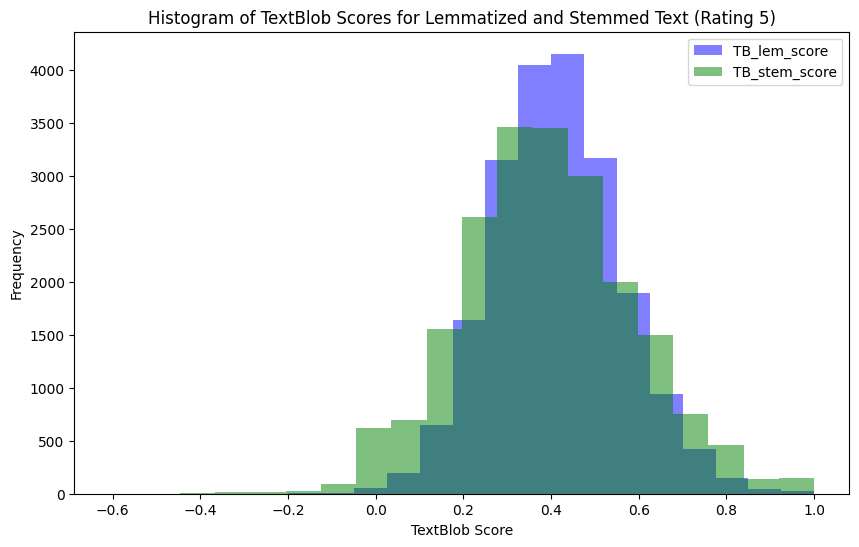

In [64]:
# Assuming star_5 is your DataFrame
top_rated_5_subset = star_5.query('rating==5')

# Plot histogram for TB_lem_score and TB_stem_score
plt.figure(figsize=(10, 6))

plt.hist(top_rated_5_subset['TB_lem_score'], alpha=0.5, label='TB_lem_score', color='blue', bins=20)
plt.hist(top_rated_5_subset['TB_stem_score'], alpha=0.5, label='TB_stem_score', color='green', bins=20)

plt.title('Histogram of TextBlob Scores for Lemmatized and Stemmed Text (Rating 5)')
plt.xlabel('TextBlob Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

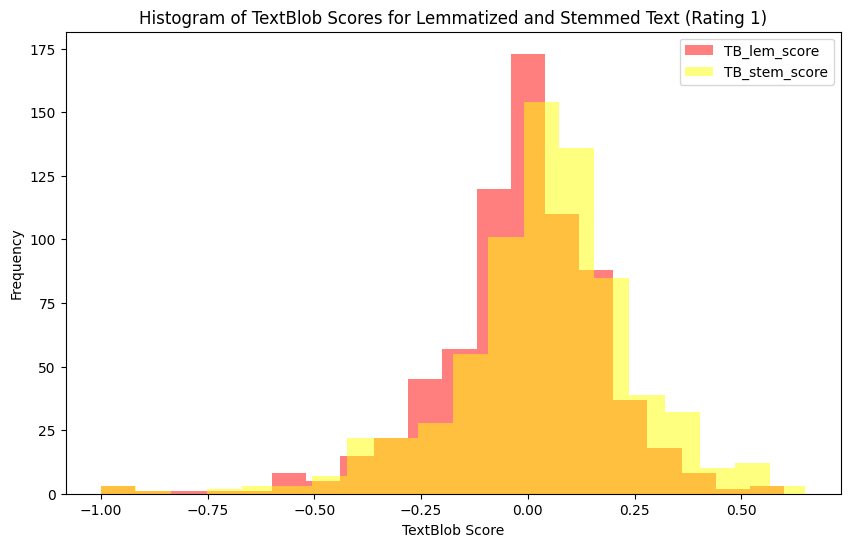

In [66]:
# Assuming star_5 is your DataFrame
bottom_rated_5_subset = star_5.query('rating==1')

# Plot histogram for TB_lem_score and TB_stem_score
plt.figure(figsize=(10, 6))

plt.hist(bottom_rated_5_subset['TB_lem_score'], alpha=0.5, label='TB_lem_score', color='red', bins=20)
plt.hist(bottom_rated_5_subset['TB_stem_score'], alpha=0.5, label='TB_stem_score', color='yellow', bins=20)

plt.title('Histogram of TextBlob Scores for Lemmatized and Stemmed Text (Rating 1)')
plt.xlabel('TextBlob Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()